# Titanic Survival Prediction with Logistic Regression


##### Author: Clinton B. Asoh-Itambi

**Lesson Overview:**

In this notebook, we will study logistic regression from the popular [scikit-learn](https://scikit-learn.org/stable/) machine learning library by applying it to a real dataset to perform classification. 

# Outline
- [Problem Statement ](#ds)
- [Dataset](#ps)
- [Model Training and Evaluation](#model)
    - [Step 1: Import necessary libraries](#1)
    - [Step 2: Load the dataset](#2)
    - [Step 3: Exploratory Data Analysis and Data preprocessing](#3)
    - [Step 4: Split the dataset into training and testing sets](#4)
    - [Step 5: Feature scaling](#5)
    - [Step 6: Train the logistic regression model](#6)
    - [Step 7: Make predictions and evaluate the model](#7)
- [Testing Model on Unseen Data](#8)

<a name="ps"></a>
## Problem Statement 

The goal of this task is to develop a predictive model that can accurately predict whether a passenger on the Titanic survived or not, based on various features provided in the [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic/data) dataset. The sinking of the Titanic was one of the most infamous shipwrecks in history, resulting in a significant loss of life. By analyzing passenger data, including attributes like age, sex, ticket class, and more, we aim to build a logistic regression model for binary classification to predict survival outcomes for passengers.

**Objective:**

- Build a logistic regression model for binary classification to predict passenger survival (0 for not survived, 1 for survived) on the Titanic.
- Use the training dataset to train the model and evaluate its performance using a test dataset (new unseen data).

<a name="ds"></a>
## Dataset
The Titanic dataset contains information about the passengers aboard the RMS Titanic, including whether they survived or not. Here are the details of the features in the dataset:

- **Survived**: This is the target variable (1 for survived, 0 for not survived).
- **Name**: Passenger name
- **PassengerId**: Passenger ID number
- **Pclass**: Passenger class (1, 2, or 3 representing first, second, or third class).
- **Sex**: Gender of the passenger (male or female).
- **Age**: Age of the passenger.
- **SibSp**: Number of siblings/spouses aboard the Titanic.
- **Parch**: Number of parents/children aboard the Titanic.
- **Ticket**: Ticket number.
- **Fare**: Passenger fare.
- **Cabin**: Cabin number.
- **Embarked**: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

<a name="model"></a>
## Model Training and Evaluation

<a name="1"></a>
### Step 1: Import necessary libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

%matplotlib inline

<a name="2"></a>
### Step 2: Load the dataset

In [2]:
# Load training dataset
train_data = pd.read_csv("titanic_dataset/train.csv")

# Preview 
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<a name="3"></a>
### Step 3: Exploratory Data Analysis and Data preprocessing 

Before applying supervised learning to a dataset, it must meet these requirements:
- No missing values
- Data in numeric format
- Data stored in pandas DataFrame or NumPy array

In [3]:
# Check for missing values
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
# Checck data type of features
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Insights:**

- We See that there are missing values for the `Age`, `Cabin` and `Embarked` features. 
- Also, the `Name`, `Sex`, `Ticket`, `Fare` and `Embarked` features are categorical, so we must drop or convert them to numerical before passing them to the model.


In [5]:
# Drop irrelevant irrelevant columns and handle missing values
train_data = train_data.drop(['Name', 'Ticket', 'Cabin'], axis=1) # Feature selection
train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

# Convert categorical variables to numerical
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})
train_data['Embarked'] = train_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0


In [6]:
# Check for missing values in cleaned data
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [7]:
# Check for duplicate rows
train_data.duplicated().sum()

0

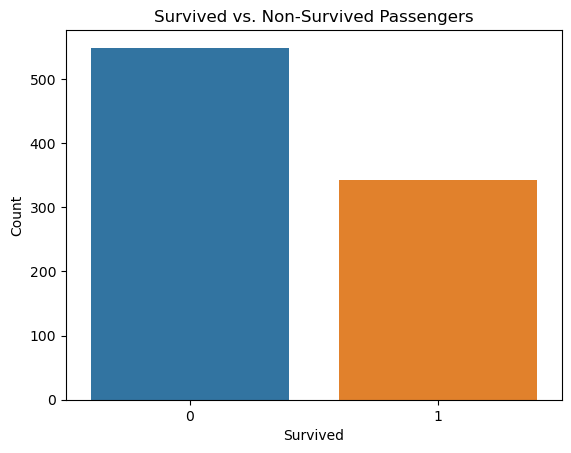

In [8]:
# Survived vs. Non-Survived Passengers:
sns.countplot(x='Survived', data=train_data)
plt.title('Survived vs. Non-Survived Passengers')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

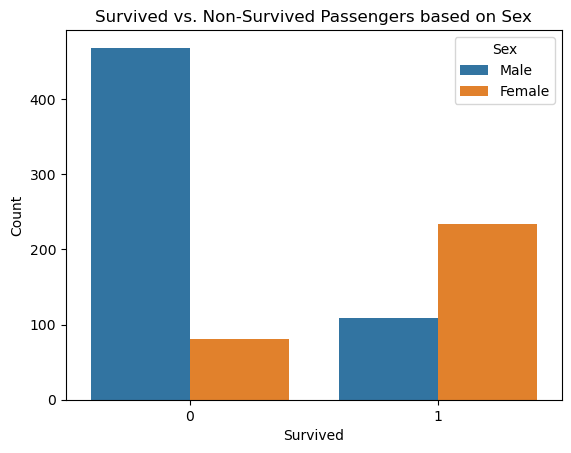

In [9]:
# Survived vs. Non-Survived Passengers based on Sex
sns.countplot(x='Survived', hue='Sex', data=train_data)
plt.title('Survived vs. Non-Survived Passengers based on Sex')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.legend(title='Sex', loc='upper right', labels=['Male', 'Female'])
plt.show()

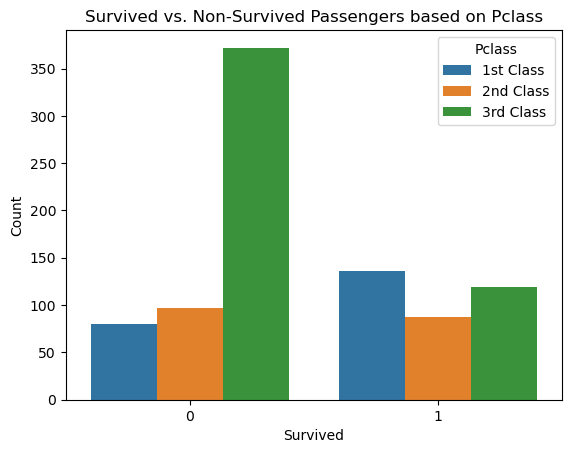

In [10]:
# Survived vs. Non-Survived Passengers based on Passenger class
sns.countplot(x='Survived', hue='Pclass', data=train_data)
plt.title('Survived vs. Non-Survived Passengers based on Pclass')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.legend(title='Pclass', loc='upper right', labels=['1st Class', '2nd Class', '3rd Class'])
plt.show()

<a name="4"></a>
### Step 4: Split the dataset into training and testing sets

In [11]:
# Create binary target variable y (Survived) and feature set (X)
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

X.shape, y.shape

((891, 8), (891,))

In [12]:
# Split the data into features and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<a name="5"></a>
### Step 5: Feature scaling

Logistic regression can be sensitive to the scale of the input features by giving more weight to features with larger scales, which can lead to biased results. So we use `StandardScaler()` to ensure that all features are on a similar scale and have equal influence on the logistic regression model.

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<a name="6"></a>
### Step 6: Train the logistic regression model

In [14]:
# Create a logistic regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train_scaled, y_train)

LogisticRegression()

<a name="7"></a>
### Step 7: Make predictions and evaluate the model

In [15]:
# Make predictions on test data
y_pred = model.predict(X_test_scaled)

# Calculate accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy: {:.2f}".format(accuracy))

Logistic Regression model accuracy: 0.80


**We could also evaluate the model using other metrics like precision, recal and F1score.**

In [16]:
# Print confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[89 16]
 [20 54]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



<a name="8"></a>
## Testing Model on Unseen Data (Generalization)

In [17]:
# Load the test dataset
test_data = pd.read_csv("titanic_dataset/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [18]:
# Performing the same pre-processing steps as was done for the training data

# Drop irrelevant columns and handle missing values
test_data_original = pd.read_csv("titanic_dataset/test.csv")

test_data = test_data.drop(['Name', 'Ticket', 'Cabin'], axis=1)
test_data['Age'].fillna(test_data['Age'].mean(), inplace=True)
test_data['Fare'].fillna(test_data['Fare'].mean(), inplace=True)
test_data['Embarked'].fillna(test_data['Embarked'].mode()[0], inplace=True)

# Convert categorical variables to numerical
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})
test_data['Embarked'] = test_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,34.5,0,0,7.8292,2
1,893,3,1,47.0,1,0,7.0000,0
2,894,2,0,62.0,0,0,9.6875,2
3,895,3,0,27.0,0,0,8.6625,0
4,896,3,1,22.0,1,1,12.2875,0


In [19]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [20]:
# Use the same scaler that was used for the training data
test_data_scaled = scaler.transform(test_data)

# Predict survival using the trained logistic regression model
y_pred_test = model.predict(test_data_scaled)

In [21]:
# Create a dataframe with the PassengerId and predicted Survived values
result_df = pd.DataFrame({'Name': test_data_original['Name'],
                          'PassengerId': test_data['PassengerId'], 
                          'Survival Prediction': y_pred_test})
result_df.head(10)

,Name,PassengerId,Survival Prediction
0,"Kelly, Mr. James",892,0
1,"Wilkes, Mrs. James (Ellen Needs)",893,0
2,"Myles, Mr. Thomas Francis",894,0
3,"Wirz, Mr. Albert",895,0
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",896,1
5,"Svensson, Mr. Johan Cervin",897,0
6,"Connolly, Miss. Kate",898,1
7,"Caldwell, Mr. Albert Francis",899,0
8,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",900,1
9,"Davies, Mr. John Samuel",901,0


<center><b><i>The End!</i></b></center>